In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
df = pd.read_csv('/Users/kaciechong/Desktop/Nexus/raw/Achieved.csv')
df

,Unnamed: 0,Textual Answer,Textual Answer.1,Textual Answer.2,Textual Answer.3,Textual Answer.4
0,NaN,Not applicable/ Don't know,Not at all,A little,Moderately,A lot
1,Opportunity to travel,7%,1%,3%,11%,78%
2,Developing independence,5%,1%,4%,18%,73%
3,Adapting to challenges,5%,1%,3%,20%,71%
4,Learning about the host (another or heritage) ...,3%,1%,6%,21%,69%
5,Developing intercultural skills,3%,1%,6%,25%,65%
6,Reasoning and problem-solving in an internatio...,3%,1%,7%,25%,63%
7,Fulfilling academic requirements,2%,3%,8%,25%,62%
8,Increased awareness of global issues,3%,1%,7%,29%,59%
9,Setting and meeting goals,6%,2%,9%,28%,55%


In [17]:
df = df.rename(columns={'Unnamed: 0': 'Achieved'})
df = df.rename(columns={'Textual Answer': 'Not applicable/Do not know'})
df = df.rename(columns={'Textual Answer.1': 'Not at all'})
df = df.rename(columns={'Textual Answer.2': 'A little'})
df = df.rename(columns={'Textual Answer.3': 'Moderately'})
df = df.rename(columns={'Textual Answer.4': 'A lot'})
df = df.drop(0)
df

,Achieved,Not applicable/Do not know,Not at all,A little,Moderately,A lot
1,Opportunity to travel,7%,1%,3%,11%,78%
2,Developing independence,5%,1%,4%,18%,73%
3,Adapting to challenges,5%,1%,3%,20%,71%
4,Learning about the host (another or heritage) ...,3%,1%,6%,21%,69%
5,Developing intercultural skills,3%,1%,6%,25%,65%
6,Reasoning and problem-solving in an internatio...,3%,1%,7%,25%,63%
7,Fulfilling academic requirements,2%,3%,8%,25%,62%
8,Increased awareness of global issues,3%,1%,7%,29%,59%
9,Setting and meeting goals,6%,2%,9%,28%,55%
10,Developing leadership skills,7%,4%,15%,31%,43%


In [18]:
df['Achieved'] = df['Achieved'].replace({
    'Learning about the host (another or heritage) culture': 'Learning about culture',
    'Reasoning and problem-solving in an international context': 'Problem-solving internationally',
    'Getting a different perspective in their field of study': 'Different perspective in field of study',
    'Expanding or improving career or postgraduate options': 'Expanding career/postgraduate options',
    'Having internship/research/volunteer opportunities': 'Internship/research/volunteering'
})

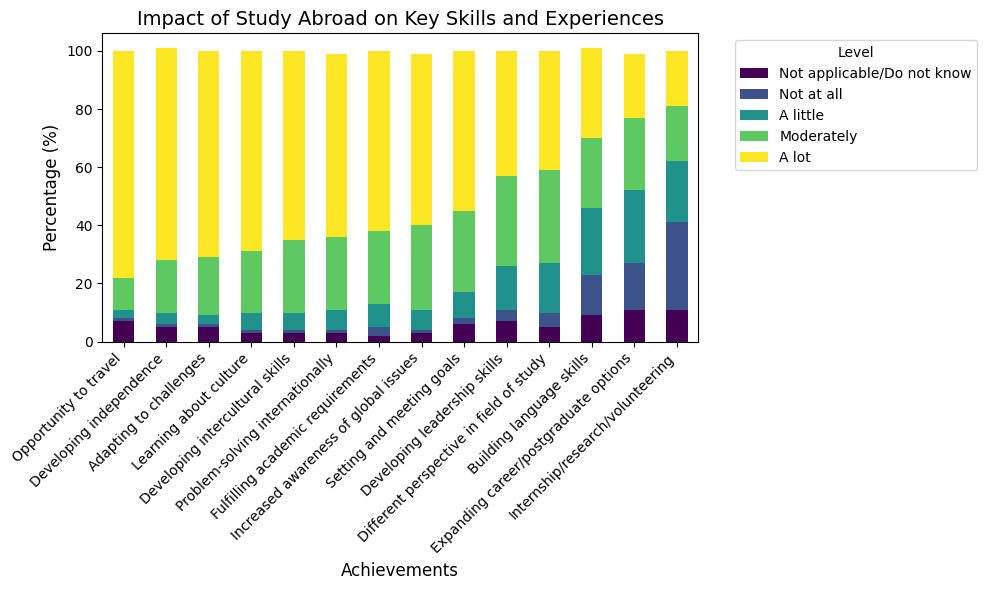

In [19]:
df.set_index('Achieved', inplace=True)

# Remove the '%' sign and convert to numeric
df = df.replace('%', '', regex=True)  # Remove '%' sign
df = df.apply(pd.to_numeric)  # Convert to numeric (as percentage)

# Plot the stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add titles and labels
plt.title('Impact of Study Abroad on Key Skills and Experiences', fontsize=14)
plt.xlabel('Achievements', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title="Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'Achievement.png')

# Save the figure
plt.savefig(save_path, dpi=300)